In [69]:
import pandas as pd

data = pd.read_csv('script/shap_values.csv')

print(data)

                        ImageName  \
0    TCGA_CS_4944_20010208_11.tif   
1    TCGA_DU_5874_19950510_25.tif   
2    TCGA_HT_A616_19991226_21.tif   
3    TCGA_DU_7302_19911203_25.tif   
4    TCGA_FG_6689_20020326_38.tif   
..                            ...   
265  TCGA_HT_A5RC_19990831_23.tif   
266  TCGA_HT_7475_19970918_18.tif   
267  TCGA_DU_5849_19950405_27.tif   
268  TCGA_DU_A5TT_19980318_39.tif   
269  TCGA_DU_7304_19930325_26.tif   

                                            ShapValues  
0    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...  
1    [ 5.96286991e-07  5.96286991e-07  5.96286991e-...  
2    [5.67989805e-07 5.67989805e-07 5.67989805e-07 ...  
3    [ 1.43985706e-07  1.43985706e-07  1.43985706e-...  
4    [ 1.01132959e-05  1.01132959e-05  1.01132959e-...  
..                                                 ...  
265  [8.20628941e-07 8.20628941e-07 8.20628941e-07 ...  
266  [ 1.37473917e-05  1.37473917e-05  1.37473917e-...  
267  [ 4.95959772e-07  4.95959772e-07  4.9

In [70]:
shap_dict = {row.ImageName: row.ShapValues for row in data.itertuples()}

for key, val in shap_dict.items():
    values = shap_dict[key].strip('[]').split()
    shap_dict[key] = np.array([float(value) for value in values]).reshape((256,256,3))

196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608
196608

2.00751142e-05
-1.0035449799999999e-07


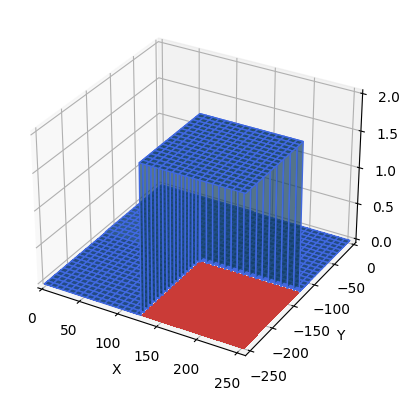

In [74]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

shap_value = shap_dict['TCGA_FG_5964_20010511_14.tif']
z = (shap_value[:, :, 0] + shap_value[:, :, 1] + shap_value[:, :, 2]) / 3
print(np.max(z))
print(np.min(z))
ax = plt.figure().add_subplot(projection='3d')

axis = np.linspace(0, 255, num = 256)
x, y = np.meshgrid(axis, axis, indexing='ij')
# Plot the 3D surface
ax.plot_surface(y, -x, z, edgecolor='royalblue', lw=1, rstride=8, cstride=8, alpha=0.7)
# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
ax.contourf(y, -x, z, zdir='z', offset=np.min(z), cmap='coolwarm')

ax.set(xlim=(np.min(x), np.max(x)), ylim=(np.min(-y), np.max(-y)), zlim=((np.min(z), np.max(z))),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()